# Гистограммы, разбиение по интервалам и плотность

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
data = np.random.randn(1000)

(array([ 19.,  53., 114., 193., 255., 198., 105.,  51.,   9.,   3.]),
 array([-2.76028335, -2.14988491, -1.53948648, -0.92908805, -0.31868961,
         0.29170882,  0.90210726,  1.51250569,  2.12290413,  2.73330256,
         3.34370099]),
 <BarContainer object of 10 artists>)

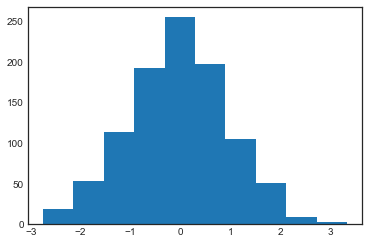

In [3]:
plt.hist(data)

In [5]:
# plt.hist?
#     x,
#     bins=None,
#     range=None,
#     density=False,
#     weights=None,
#     cumulative=False,
#     bottom=None,
#     histtype='bar',
#     align='mid',
#     orientation='vertical',
#     rwidth=None,
#     log=False,
#     color=None,
#     label=None,
#     stacked=False,
#     *,
#     data=None,
#     **kwargs,

(array([ 6.,  6.,  7., 12., 13., 28., 31., 30., 53., 71., 54., 68., 89.,
        85., 81., 68., 81., 49., 40., 39., 26., 26., 16.,  9.,  4.,  3.,
         2.,  1.,  1.,  1.]),
 array([-2.76028335, -2.5568172 , -2.35335106, -2.14988491, -1.94641877,
        -1.74295263, -1.53948648, -1.33602034, -1.13255419, -0.92908805,
        -0.7256219 , -0.52215576, -0.31868961, -0.11522347,  0.08824268,
         0.29170882,  0.49517497,  0.69864111,  0.90210726,  1.1055734 ,
         1.30903955,  1.51250569,  1.71597184,  1.91943798,  2.12290413,
         2.32637027,  2.52983641,  2.73330256,  2.9367687 ,  3.14023485,
         3.34370099]),
 [<matplotlib.patches.Polygon at 0x21658ce3d00>])

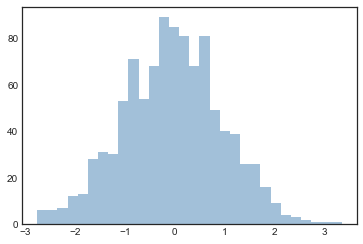

In [7]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

In [8]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

In [13]:
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

(array([ 2.,  2.,  2.,  4.,  2.,  7.,  6.,  4., 14., 14., 22., 22., 33.,
        37., 39., 42., 67., 48., 49., 55., 79., 41., 68., 47., 54., 55.,
        31., 32., 24., 15., 27., 18., 12.,  7.,  5.,  6.,  1.,  1.,  2.,
         4.]),
 array([-3.14092432, -2.83934185, -2.53775938, -2.23617691, -1.93459444,
        -1.63301197, -1.33142951, -1.02984704, -0.72826457, -0.4266821 ,
        -0.12509963,  0.17648283,  0.4780653 ,  0.77964777,  1.08123024,
         1.38281271,  1.68439517,  1.98597764,  2.28756011,  2.58914258,
         2.89072505,  3.19230751,  3.49388998,  3.79547245,  4.09705492,
         4.39863739,  4.70021985,  5.00180232,  5.30338479,  5.60496726,
         5.90654973,  6.20813219,  6.50971466,  6.81129713,  7.1128796 ,
         7.41446207,  7.71604453,  8.017627  ,  8.31920947,  8.62079194,
         8.92237441]),
 [<matplotlib.patches.Polygon at 0x21658d48280>])

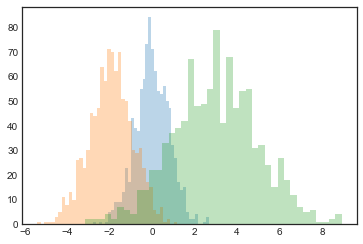

In [15]:
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

###### Существует ф-ия позволяющая подсчитать кол-во точек в заданном интервале, без отображения ``np.histogram()``

In [16]:
counts, bin_edges = np.histogram(data, bins=5)
counts

array([ 72, 307, 453, 156,  12], dtype=int64)

## Двумерные гистограммы и разбиение по интервалам

In [17]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
x

array([-0.80713763, -1.9386318 ,  0.24287922, ...,  0.66066758,
       -0.54316094, -0.74900057])

### ``plt.hist2d`` : двумерная гистограмма

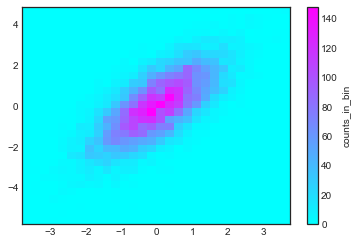

In [19]:
plt.hist2d(x, y, bins=30, cmap='cool')
cb = plt.colorbar()
cb.set_label('counts_in_bin') # кол-во в интервале

In [21]:
# кол-во точек в заданном интервале, без отображения
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
# counts 

### Ф-ия ``plt.hexbin``: гексагональное разбитие по интервалам

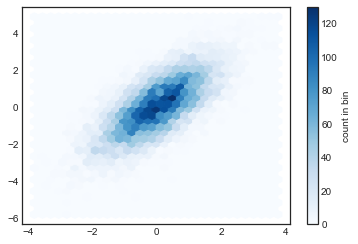

In [22]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin') # кол-во в интервале

In [24]:
# plt.hexbin?
#     x,
#     y,
#     C=None,
#     gridsize=100,
#     bins=None,
#     xscale='linear',
#     yscale='linear',
#     extent=None,
#     cmap=None,
#     norm=None,
#     vmin=None,
#     vmax=None,
#     alpha=None,
#     linewidths=None,
#     edgecolors='face',
#     reduce_C_function=<function mean at 0x0000021656861700>,
#     mincnt=None,
#     marginals=False,
#     *,
#     data=None,
#     **kwargs,

## Ядерная оценка плотности распределения *kernel density estimation* ``KDE``

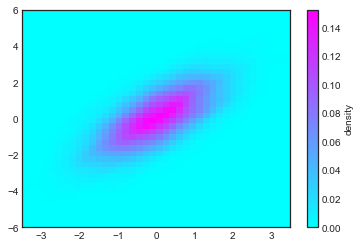

In [25]:
from scipy.stats import gaussian_kde

# выполняем подбор на массиве размера [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# Вычисляем на регулярной координатной сетке
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Выводим график результата в виде изображения
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='cool'
          )
cb = plt.colorbar()
cb.set_label('density')
# это никакой не гексагонал, а в книге гексагонал

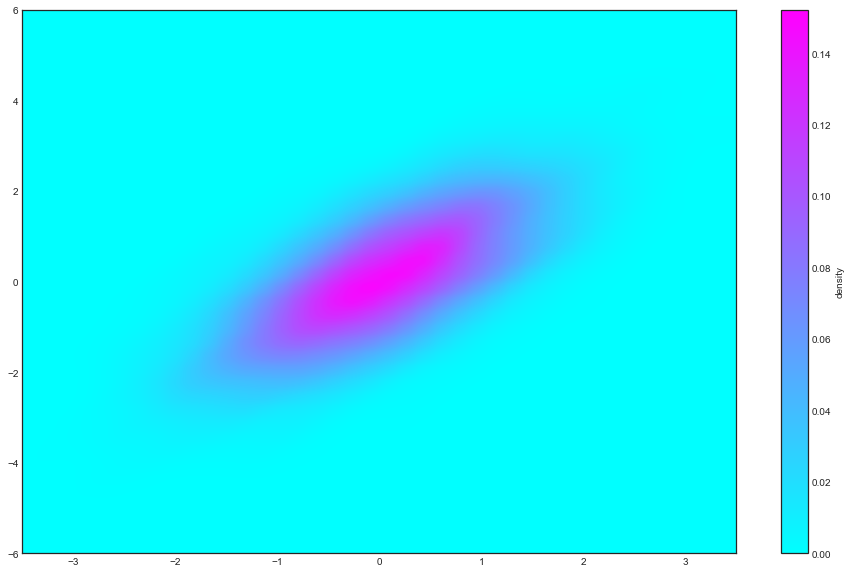

In [26]:
plt.figure(figsize=(16,10))
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='cool',
           interpolation='gaussian'
          )
cb = plt.colorbar()
cb.set_label('density')

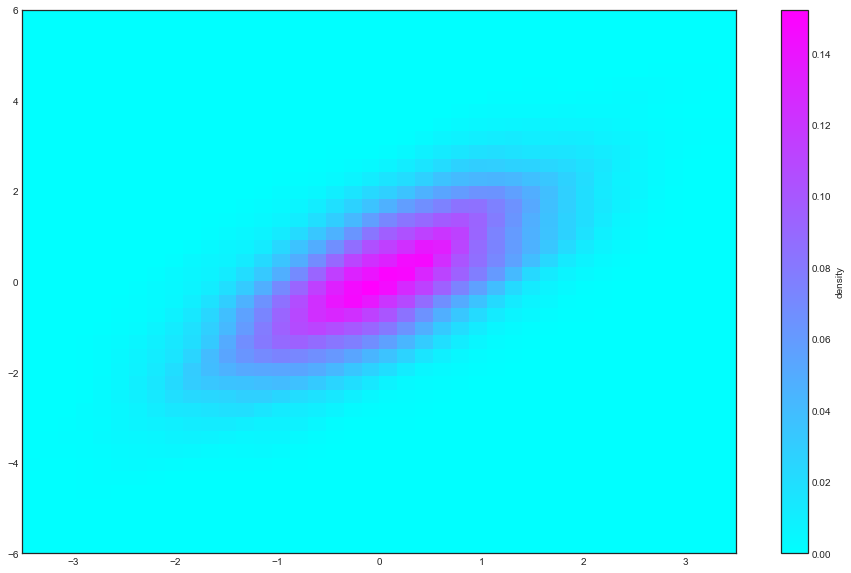

In [27]:
plt.figure(figsize=(16,10))
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='cool',
          )
cb = plt.colorbar()
cb.set_label('density')

###### Длина сглаживания метода KDE позволяет эффективно выбирать компромис м/у гладкостью и детализацией (один из примеров вездесущих компромисов м/у смещением и дисперсией)